In [3]:
import warnings
import numpy as np
import pandas as pd
# Ignore warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
df_train=pd.read_csv(r"train.csv")
df_test=pd.read_csv(r"test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35827 entries, 0 to 35826
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         35827 non-null  int64  
 1   id                                 35827 non-null  int64  
 2   Gender                             35827 non-null  object 
 3   Customer Type                      35827 non-null  object 
 4   Age                                35826 non-null  float64
 5   Type of Travel                     35826 non-null  object 
 6   Class                              35826 non-null  object 
 7   Flight Distance                    35826 non-null  float64
 8   Inflight wifi service              35826 non-null  float64
 9   Departure/Arrival time convenient  35826 non-null  float64
 10  Ease of Online booking             35826 non-null  float64
 11  Gate location                      35826 non-null  flo

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
df_test['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


In [8]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [9]:
df_train = df_train.drop(columns=['Unnamed: 0', 'id'])
df_test = df_test.drop(columns=['Unnamed: 0', 'id'])

Evaluation results for Logistic Regression:
Accuracy: 0.8147, Precision: 0.7686, Recall: 0.8269, F1-score: 0.7967


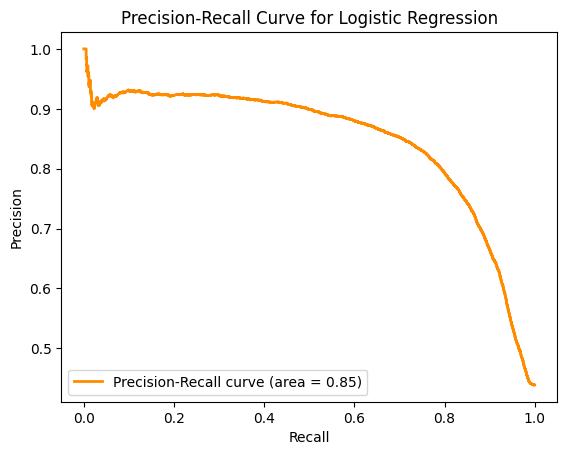

Evaluation results for Decision Tree:
Accuracy: 0.9387, Precision: 0.9261, Recall: 0.9350, F1-score: 0.9305


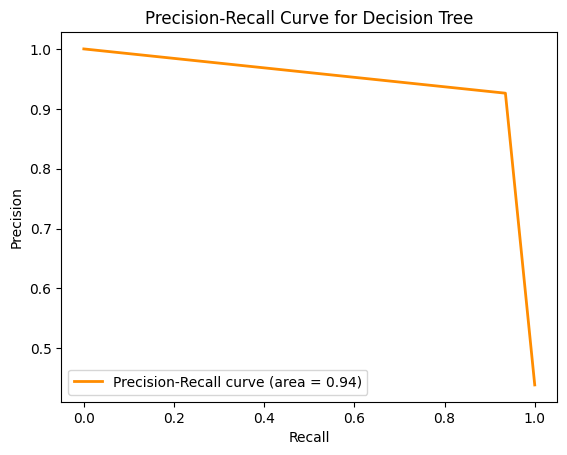

Evaluation results for Random Forest:
Accuracy: 0.9580, Precision: 0.9659, Recall: 0.9374, F1-score: 0.9514


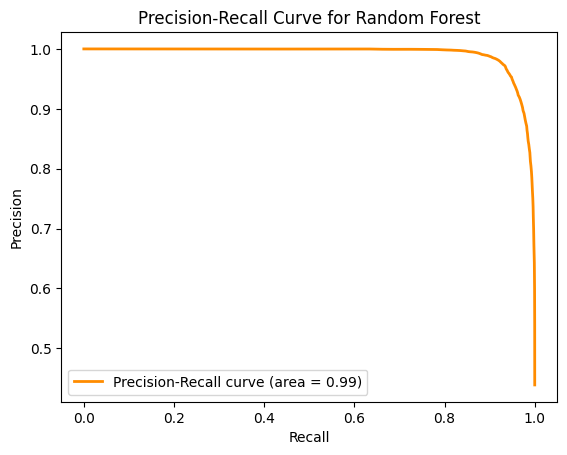

Evaluation results for Neural Network:
Accuracy: 0.9282, Precision: 0.9250, Recall: 0.9103, F1-score: 0.9176


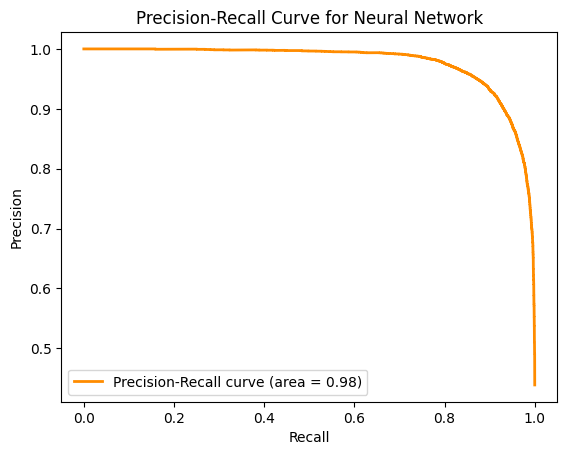

Cross-validation scores for Logistic Regression:
Accuracy: 0.8113 ± 0.0062
Precision: 0.7644 ± 0.0081
Recall: 0.8219 ± 0.0066
F1-score: 0.7921 ± 0.0064
Cross-validation scores for Decision Tree:
Accuracy: 0.9378 ± 0.0027
Precision: 0.9285 ± 0.0050
Recall: 0.9294 ± 0.0060
F1-score: 0.9289 ± 0.0031
Cross-validation scores for Random Forest:
Accuracy: 0.9568 ± 0.0017
Precision: 0.9643 ± 0.0052
Recall: 0.9358 ± 0.0043
F1-score: 0.9498 ± 0.0019
Cross-validation scores for Neural Network:
Accuracy: 0.9020 ± 0.0197
Precision: 0.8710 ± 0.0520
Recall: 0.9170 ± 0.0260
F1-score: 0.8918 ± 0.0173


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
# Encode categorical variables with object datatype
label_encoder = LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = label_encoder.fit_transform(df_train[column])
        df_test[column] = label_encoder.transform(df_test[column])

# Separate features and target variable
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train decision trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Train random forests
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train neural networks
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

# Evaluate models on test data
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Neural Network": nn_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Precision-recall curve
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend(loc="lower left")
    plt.show()

# Apply cross-validation to each model
cv_scores = {}
for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_scores[name] = cv_results

# Print cross-validation scores
for name, scores in cv_scores.items():
    print(f"Cross-validation scores for {name}:")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
    print(f"Precision: {scores['test_precision'].mean():.4f} ± {scores['test_precision'].std():.4f}")
    print(f"Recall: {scores['test_recall'].mean():.4f} ± {scores['test_recall'].std():.4f}")
    print(f"F1-score: {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")


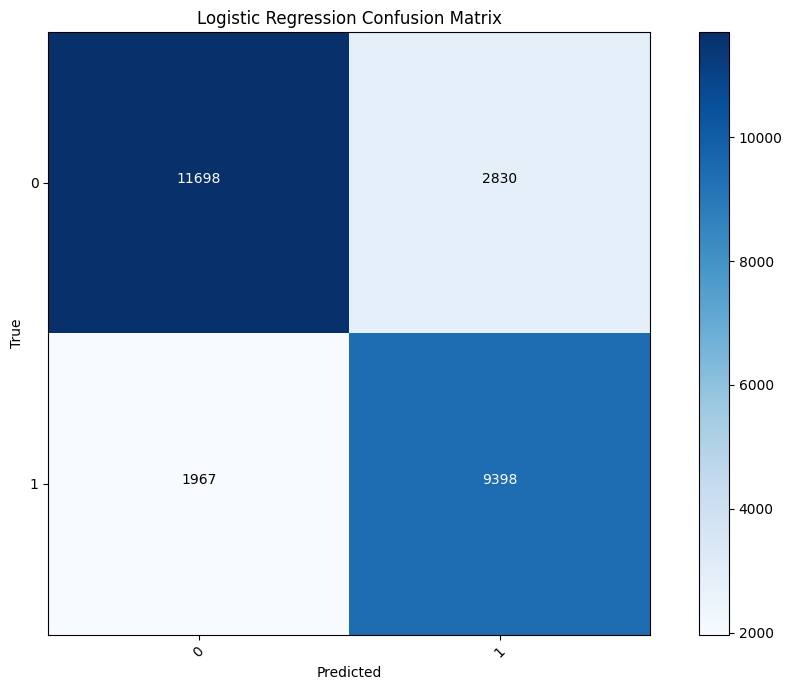

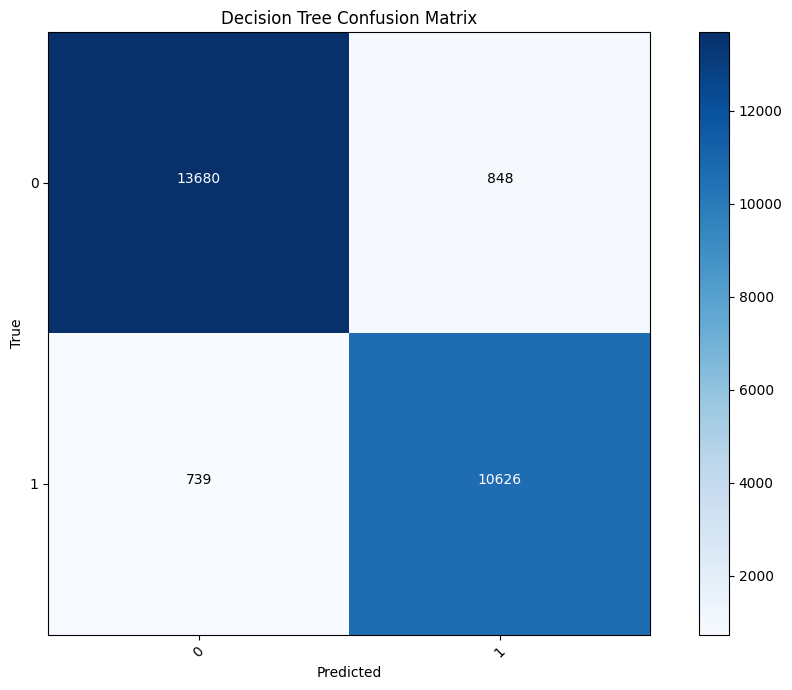

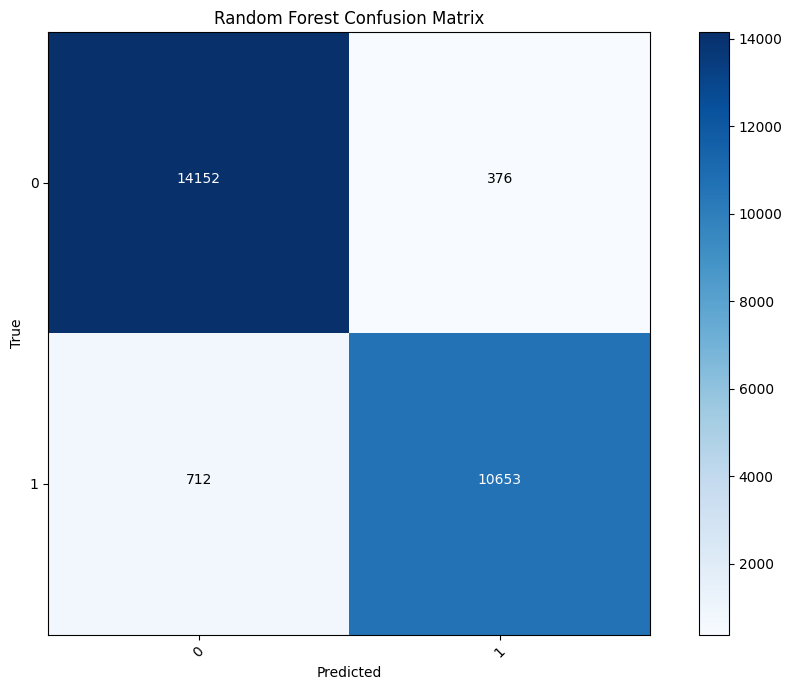

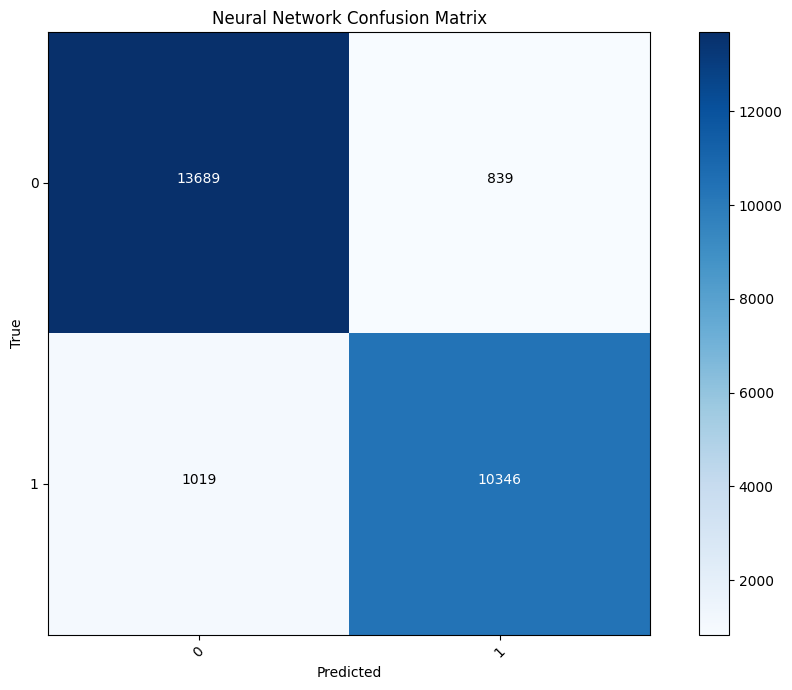

In [11]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix with imshow
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')

    # Add color bar
    plt.colorbar()

    # Set ticks
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Add annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


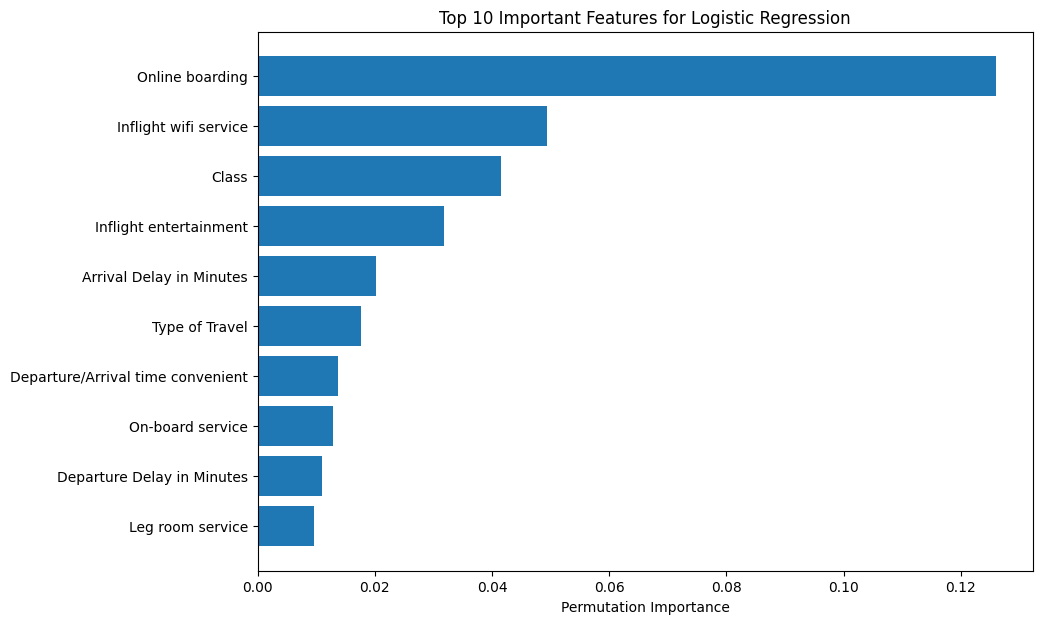

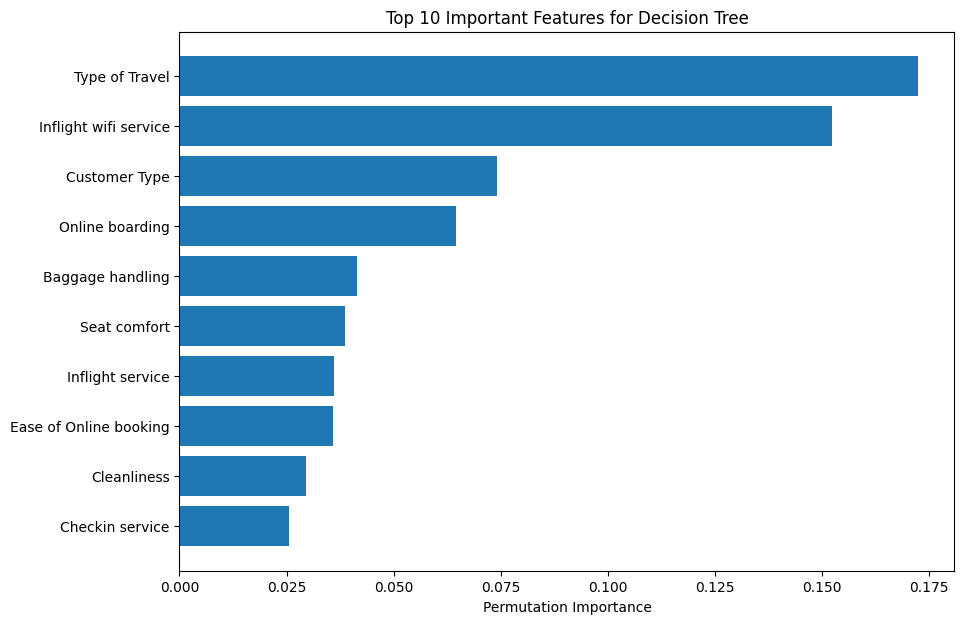

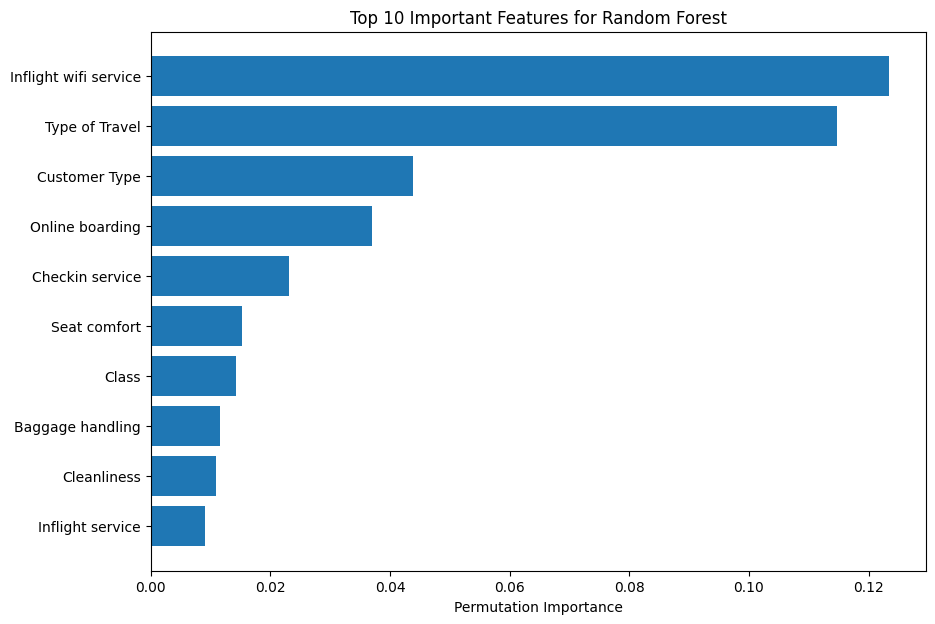

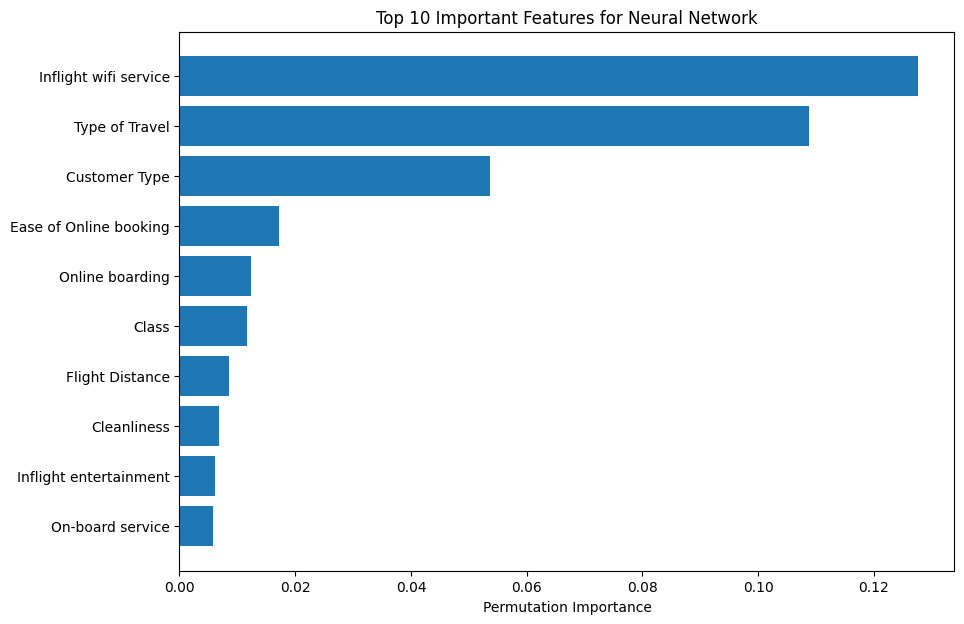

In [12]:
from sklearn.inspection import permutation_importance

# Function to plot top N important features using permutation importance
def plot_permutation_importance(model, X_test, y_test, name, top_n=10):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()[-top_n:]
    plt.figure(figsize=(10, 7))
    plt.barh(range(top_n), result.importances_mean[sorted_idx], align='center')
    plt.yticks(range(top_n), [X_test.columns[i] for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title(f'Top {top_n} Important Features for {name}')
    plt.show()

# Plot top 10 important features using permutation importance for each model
for name, model in models.items():
    plot_permutation_importance(model, X_test, y_test, name, top_n=10)
